In [1]:
# IMPORT STAT TOOLS
from pandas import Series, DataFrame
from os import walk
import pandas as pd

In [2]:
# PATHS
input_filepath = 'D:\\Data3\\'

# GETTING ALL FILES AS LIST

all_files = []
for (dirpath, dirnames, filenames) in walk(input_filepath):
    all_files.extend(filenames)
    break

# SELECTING PCAP FILES AS LIST

csv_files = []
for filename in all_files:
    if '.pcap.csv' in filename:
        csv_files.append(filename)

#### PROCESSING CSV FILES

In [3]:
main_dframe = DataFrame()

In [4]:
index = 0
dframe_list = []

for filename in csv_files:
    index += 1
    print('|', end='')
    if index%80 == 0:
        print()
    
    # READ FILE AND APPEND
    dframe = pd.read_csv(input_filepath + filename, index_col=None, header=0)
    dframe_list.append(dframe)
    
main_dframe = pd.concat(dframe_list)

print('\nFiles processed:', index)

|
Files processed: 1


In [5]:
# IMPORT STAT TOOLS
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

# IMPORT PLOTTING
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# CHANGE FIGURE SIZE
import matplotlib.pylab as pylab
pylab.rcParams['figure.figsize'] = 16, 12

# IMPORT OTHER
import os

In [6]:
def give_date(timestamp):
    import datetime
    return datetime.datetime.fromtimestamp(
            int(timestamp)
        ).strftime('%Y-%m-%d %H:%M:%S')
    

In [7]:
main_dframe.head()


,frame.number,frame.time_epoch,frame.len,ip.src,ip.dst,ip.ttl,tcp.srcport,tcp.dstport,tcp.flags,tcp.seq,tcp.stream,udp.srcport,udp.dstport,icmp.type,icmp.code
0,1,1331901000,117,192.168.229.254,192.168.202.79,254,443,46117,24,1,0,NaN,NaN,NaN,NaN
1,2,1331901000,269,192.168.202.79,192.168.229.254,64,46117,443,24,1,0,NaN,NaN,NaN,NaN
2,3,1331901000,70,192.168.202.79,192.168.229.251,64,50463,80,17,1,1,NaN,NaN,NaN,NaN
3,4,1331901000,70,192.168.229.254,192.168.202.79,254,443,46117,16,48,0,NaN,NaN,NaN,NaN
4,5,1331901000,78,192.168.202.79,192.168.229.251,64,50465,80,2,0,2,NaN,NaN,NaN,NaN


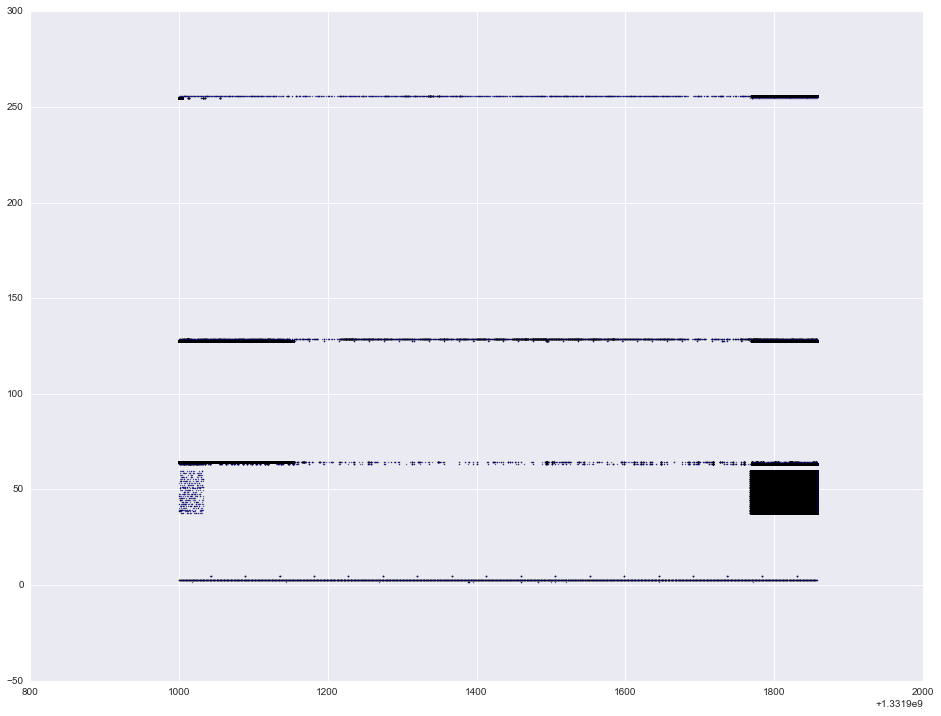

In [9]:
plt.scatter(main_dframe['frame.time_epoch'], main_dframe['ip.ttl'], s=1, marker=',', alpha=0.5)

(0, 21)

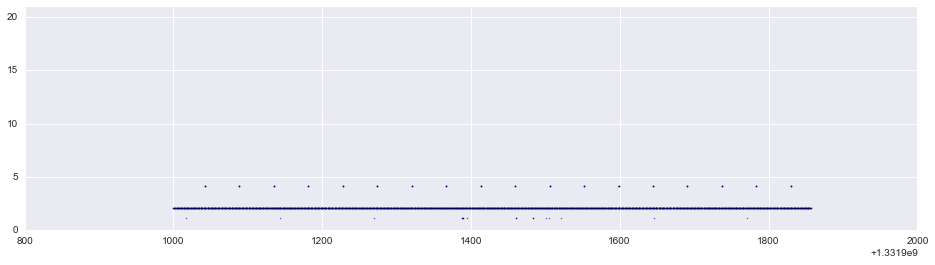

In [11]:
pylab.rcParams['figure.figsize'] = 16, 4
plt.scatter(main_dframe['frame.time_epoch'], main_dframe['ip.ttl'], s=1, marker=',', alpha=0.5)
plt.ylim(0,21)


(20, 70)

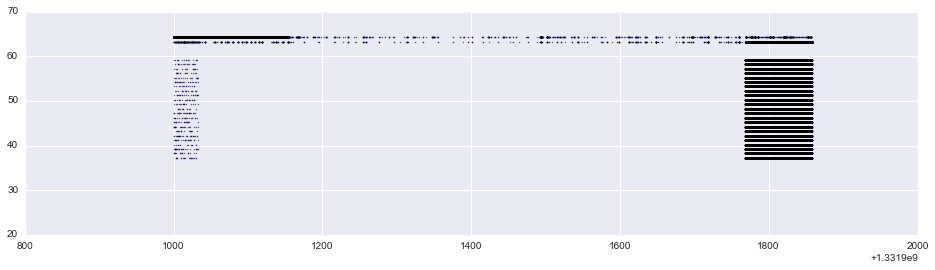

In [12]:
pylab.rcParams['figure.figsize'] = 16, 4
plt.scatter(main_dframe['frame.time_epoch'], main_dframe['ip.ttl'], s=1, marker=',', alpha=0.5)
plt.ylim(20,70)

(70, 128)

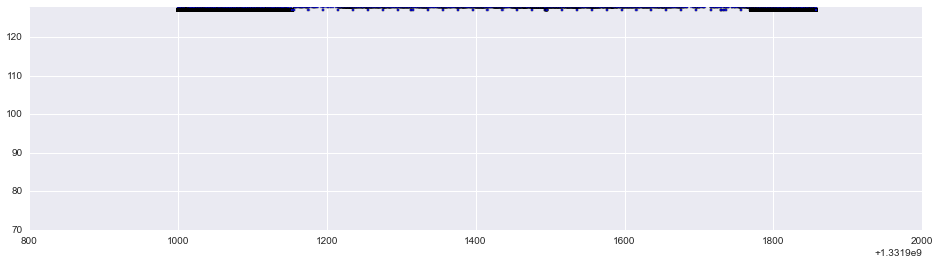

In [13]:
pylab.rcParams['figure.figsize'] = 16, 4
plt.scatter(main_dframe['frame.time_epoch'], main_dframe['ip.ttl'], s=2, marker=',', alpha=0.5)
plt.ylim(70,128)

(128, 256)

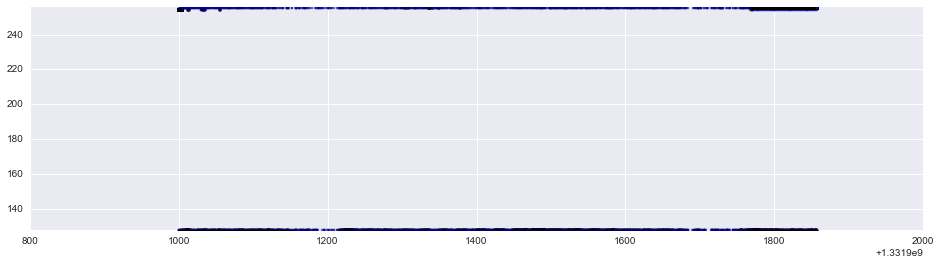

In [14]:
pylab.rcParams['figure.figsize'] = 16, 4
plt.scatter(main_dframe['frame.time_epoch'], main_dframe['ip.ttl'], s=2, marker=',', alpha=0.5)
plt.ylim(128,256)

(220, 256)

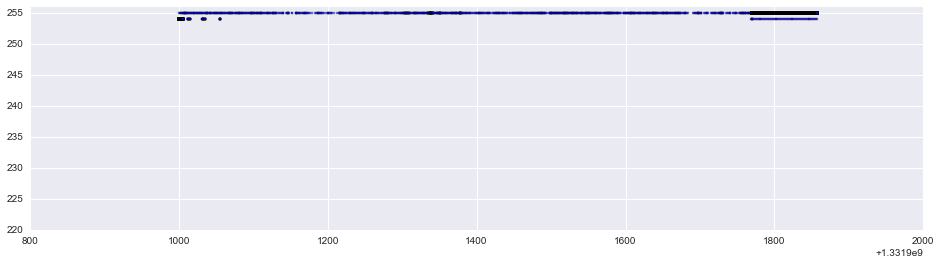

In [15]:
pylab.rcParams['figure.figsize'] = 16, 4
plt.scatter(main_dframe['frame.time_epoch'], main_dframe['ip.ttl'], s=2, marker=',', alpha=0.5)
plt.ylim(220,256)

In [16]:
tcp_dframe = DataFrame(main_dframe, columns=['tcp.srcport', 'tcp.dstport', 'ip.ttl', 'tcp.flags'])

In [17]:
tcp_dframe.shape

(1000000, 4)

In [18]:
tcp_dframe.dropna()
tcp_dframe.shape

(1000000, 4)

In [19]:
tcp_dframe = tcp_dframe.dropna()

In [20]:
tcp_dframe.shape

(978870, 4)

(-1, 65540)

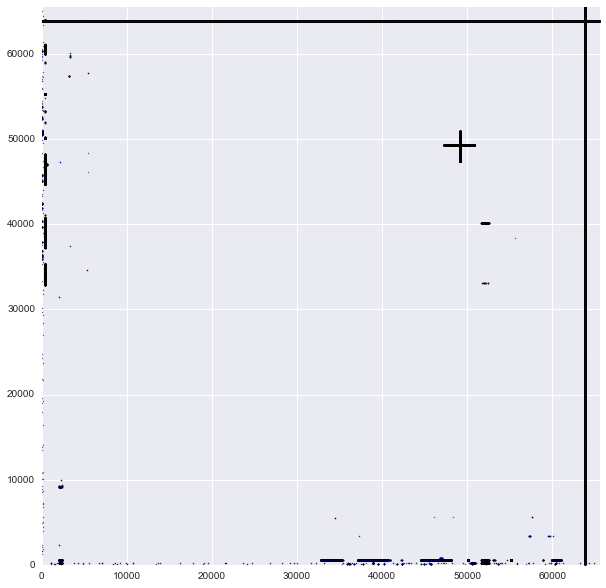

In [21]:
pylab.rcParams['figure.figsize'] = 10, 10
plt.scatter(tcp_dframe['tcp.srcport'], tcp_dframe['tcp.dstport'], s=1, marker=',', alpha=0.5)
plt.xlim(-1, 65540)
plt.ylim(-1, 65540)

(-1, 65540)

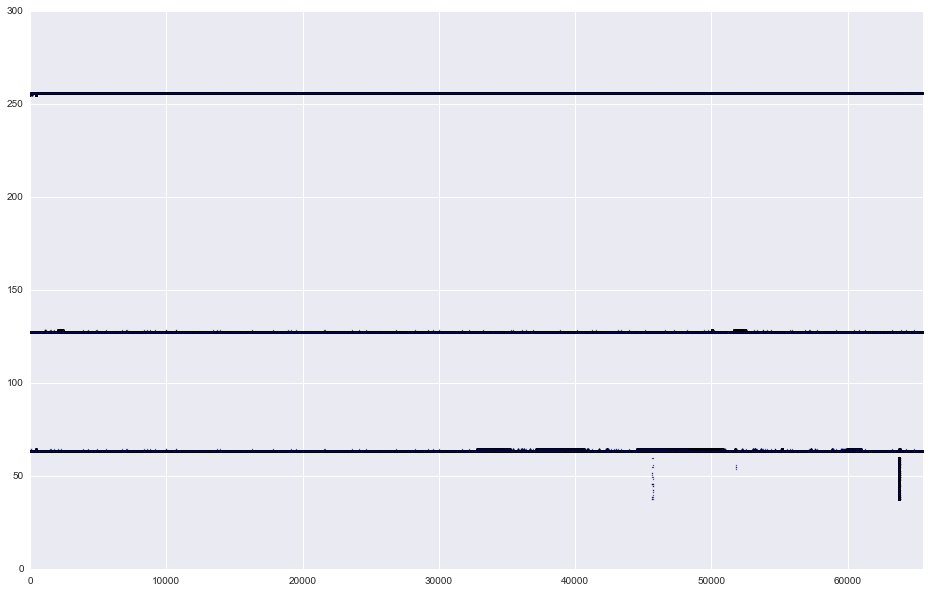

In [22]:
pylab.rcParams['figure.figsize'] = 16, 10
plt.scatter(tcp_dframe['tcp.srcport'], tcp_dframe['ip.ttl'], s=1, marker=',', alpha=0.5)
plt.xlim(-1, 65540)

In [23]:
2 * np.pi * np.random.rand(10)

array([ 3.17501845,  5.03160287,  0.02764183,  4.18903826,  4.60750771,
        2.61072391,  1.63527921,  3.02736666,  4.5427151 ,  3.40741654])

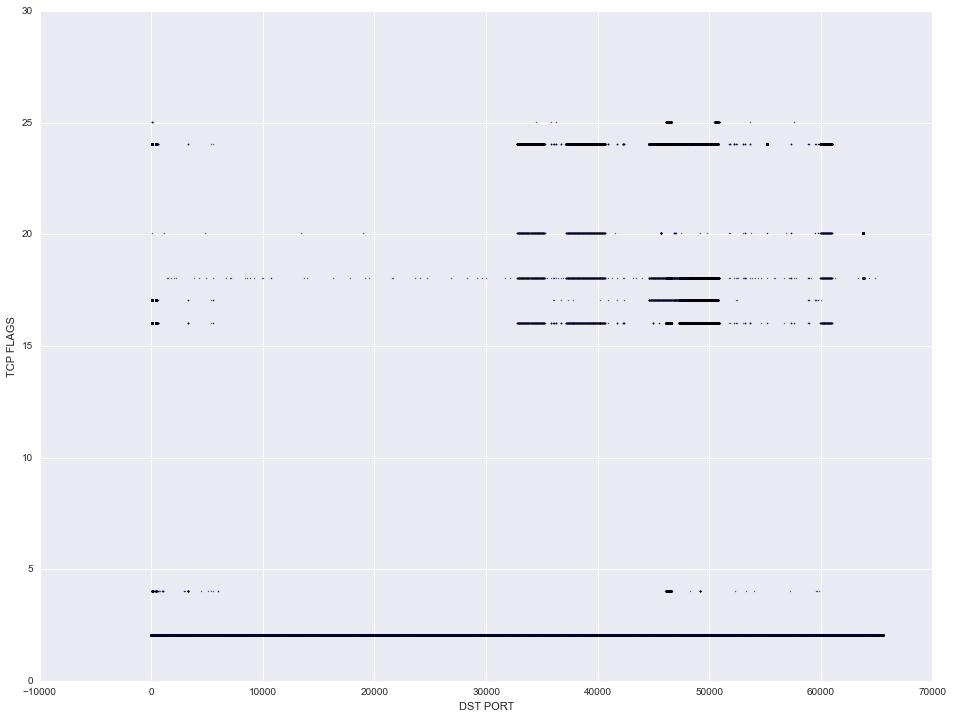

In [26]:
pylab.rcParams['figure.figsize'] = 16, 12
plt.scatter(tcp_dframe['tcp.dstport'], tcp_dframe['tcp.flags'], s=1, marker=',', alpha=0.5)
plt.ylabel('TCP FLAGS')
plt.xlabel('DST PORT')

#plt.ylim(-1, 59)

In [27]:
main_dframe.head()

,frame.number,frame.time_epoch,frame.len,ip.src,ip.dst,ip.ttl,tcp.srcport,tcp.dstport,tcp.flags,tcp.seq,tcp.stream,udp.srcport,udp.dstport,icmp.type,icmp.code
0,1,1331901000,117,192.168.229.254,192.168.202.79,254,443,46117,24,1,0,NaN,NaN,NaN,NaN
1,2,1331901000,269,192.168.202.79,192.168.229.254,64,46117,443,24,1,0,NaN,NaN,NaN,NaN
2,3,1331901000,70,192.168.202.79,192.168.229.251,64,50463,80,17,1,1,NaN,NaN,NaN,NaN
3,4,1331901000,70,192.168.229.254,192.168.202.79,254,443,46117,16,48,0,NaN,NaN,NaN,NaN
4,5,1331901000,78,192.168.202.79,192.168.229.251,64,50465,80,2,0,2,NaN,NaN,NaN,NaN


In [28]:
def ip2str(ip_string):
    """Convert IP from dot octet notation to single decimal"""
    ip_arr = ip_string.split(".")
    if len(ip_arr) == 4:
        for octet in ip_arr:
            if len(octet.strip(" ")) > 0:
                result = int(ip_arr[0]) * 256 * 256 * 256 + \
                       int(ip_arr[1]) * 256 * 256 + \
                       int(ip_arr[2]) * 256 + \
                       int(ip_arr[3])
                if result > 4294967295 or result < 0:
                    print("[ERR] IP out of IPv4 range detected.", ip_string)
                    return -1
                else:
                    return result

            else:
                print("[ERR] Missing octets detected.", ip_string)
                return -1
    else:
        print("[ERR] Provided IP", ip_string, "does not contain 4 octets.")
        return -1

In [29]:
ip_frame = DataFrame(main_dframe, columns=['ip.src', 'ip.dst', 'ip.ttl', 'frame.len'])

In [30]:
ip_frame = ip_frame.dropna()

In [31]:
ip_src_torepl = Series(ip_frame['ip.src']).unique()

In [32]:
ip_src_torepl.shape

(90,)

In [33]:
ip_dst_torepl = Series(ip_frame['ip.dst']).unique()

In [34]:
ip_dst_torepl.shape

(535,)

In [35]:
ip_src_repl = []
for ip in ip_src_torepl:
    if str(ip) != "nan":
        s = ip2str(str(ip))
        if s not in ip_src_repl:
            ip_src_repl.append(s)
    else:
        ip_src_repl.append(0)

In [36]:
ip_dst_repl = []
for ip in ip_dst_torepl:
    if str(ip) != "nan":
        s = ip2str(str(ip))
        if s not in ip_dst_repl:
            ip_dst_repl.append(s)
    else:
        ip_dst_repl.append(0)

In [37]:
ip_repl = []
ip_repl.extend(ip_src_repl)
ip_repl.extend(ip_dst_repl)
ip_torepl = []
ip_torepl.extend(ip_src_torepl)
ip_torepl.extend(ip_dst_torepl)

In [38]:
ip_frames = []
ip_frames = np.array_split(ip_frame, 20)

In [39]:
ip_frames[0].head()
len(ip_torepl)

625

In [40]:
for i in range(len(ip_frames)):
    tmp = DataFrame(ip_frames[i])
    tmp = tmp.replace(to_replace=ip_torepl, value=ip_repl)
    ip_frames[i] = tmp
    print('DataFrame', i, 'processed.')

DataFrame 0 processed.
DataFrame 1 processed.
DataFrame 2 processed.
DataFrame 3 processed.
DataFrame 4 processed.
DataFrame 5 processed.
DataFrame 6 processed.
DataFrame 7 processed.
DataFrame 8 processed.
DataFrame 9 processed.
DataFrame 10 processed.
DataFrame 11 processed.
DataFrame 12 processed.
DataFrame 13 processed.
DataFrame 14 processed.
DataFrame 15 processed.
DataFrame 16 processed.
DataFrame 17 processed.
DataFrame 18 processed.
DataFrame 19 processed.


In [41]:
comb_frame = pd.concat(ip_frames)

In [44]:
comb_frame.head()


,ip.src,ip.dst,ip.ttl,frame.len
0,3232294398,3232287311,254,117
1,3232287311,3232294398,64,269
2,3232287311,3232294395,64,70
3,3232294398,3232287311,254,70
4,3232287311,3232294395,64,78


(3232284398, 3232294398)

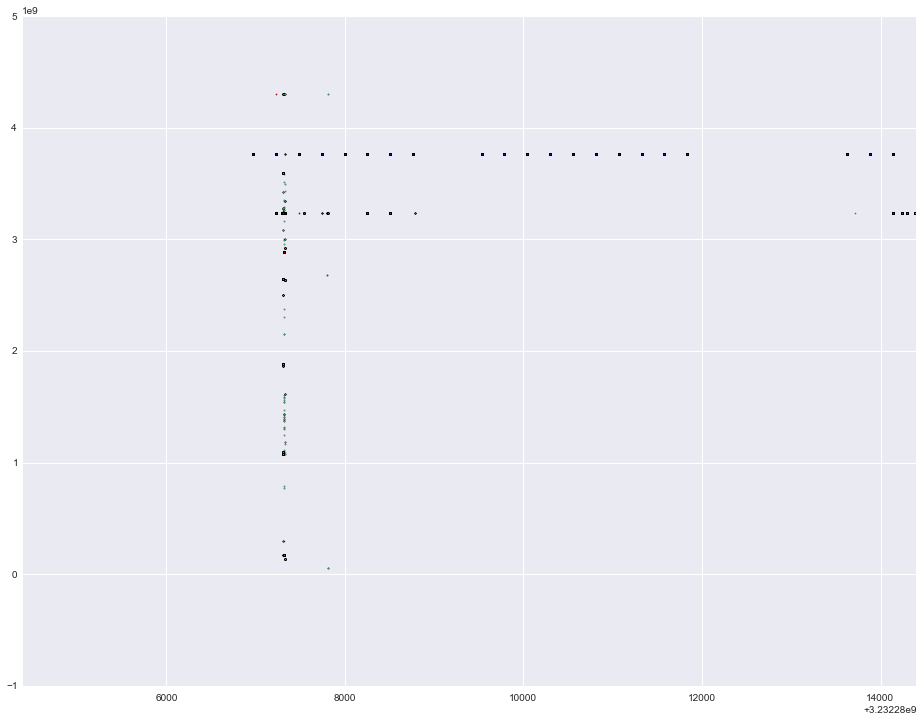

In [51]:
plt.scatter(comb_frame['ip.src'], comb_frame['ip.dst'], c=comb_frame['ip.ttl'], cmap='rainbow', alpha=0.5, s=1, marker=',')
plt.xlim(comb_frame['ip.src'].max()-10000, comb_frame['ip.src'].max() )

In [52]:
# TRYING 3D

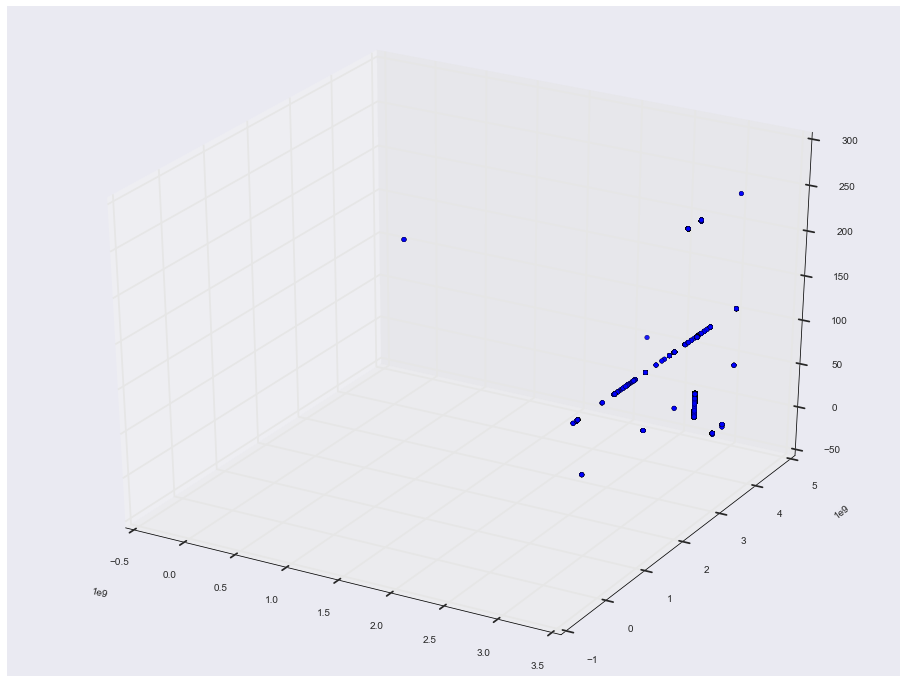

In [55]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(comb_frame['ip.src'], comb_frame['ip.dst'], comb_frame['ip.ttl'])


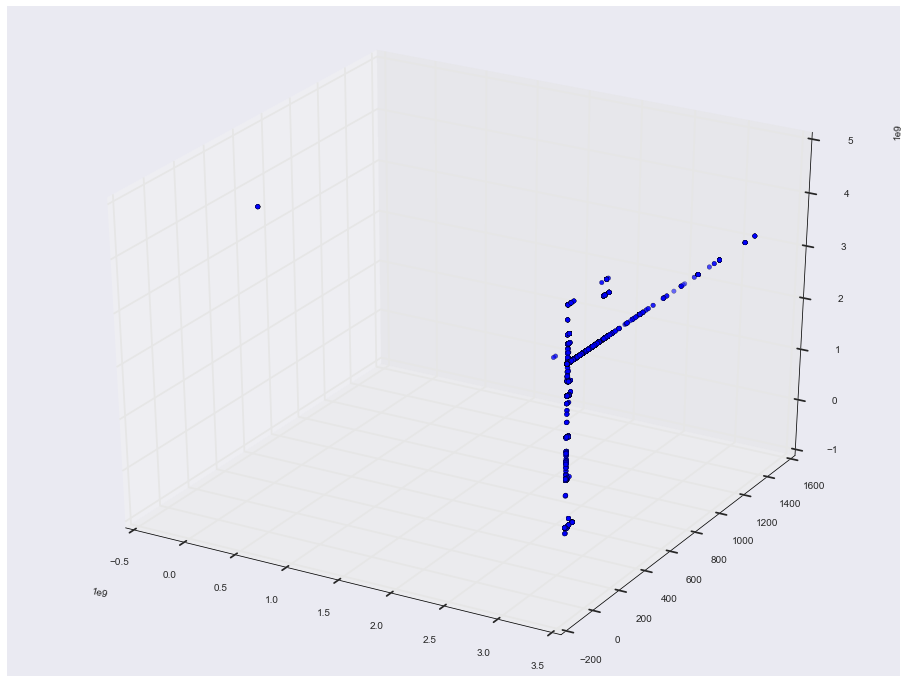

In [56]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(comb_frame['ip.src'], comb_frame['frame.len'], comb_frame['ip.dst'])

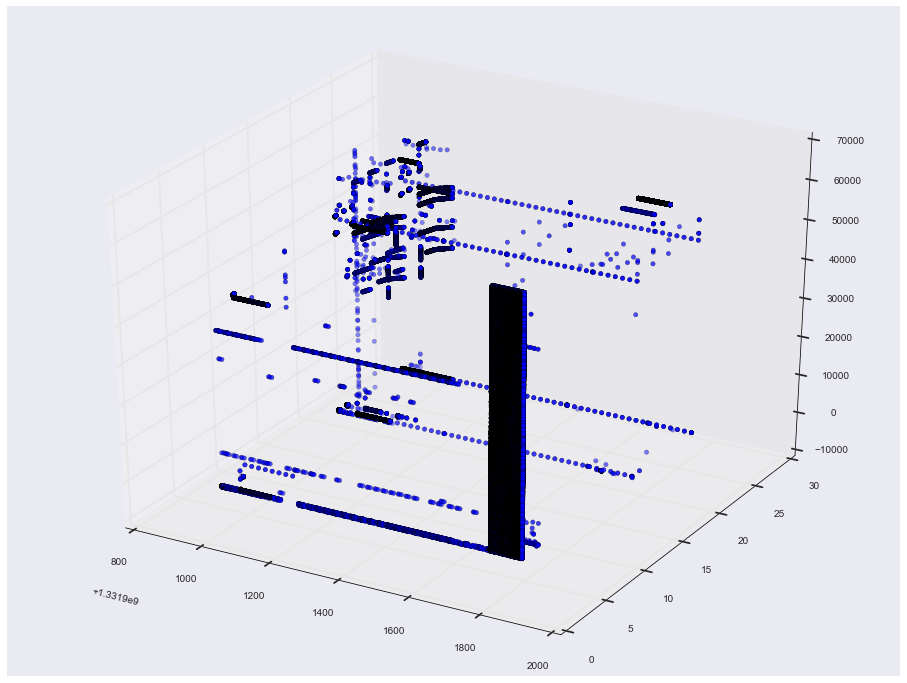

In [57]:
fig = plt.figure()
ax.title('-')
ax = fig.add_subplot(111, projection='3d')

ax.scatter(main_dframe['frame.time_epoch'], main_dframe['tcp.flags'], main_dframe['tcp.dstport'])

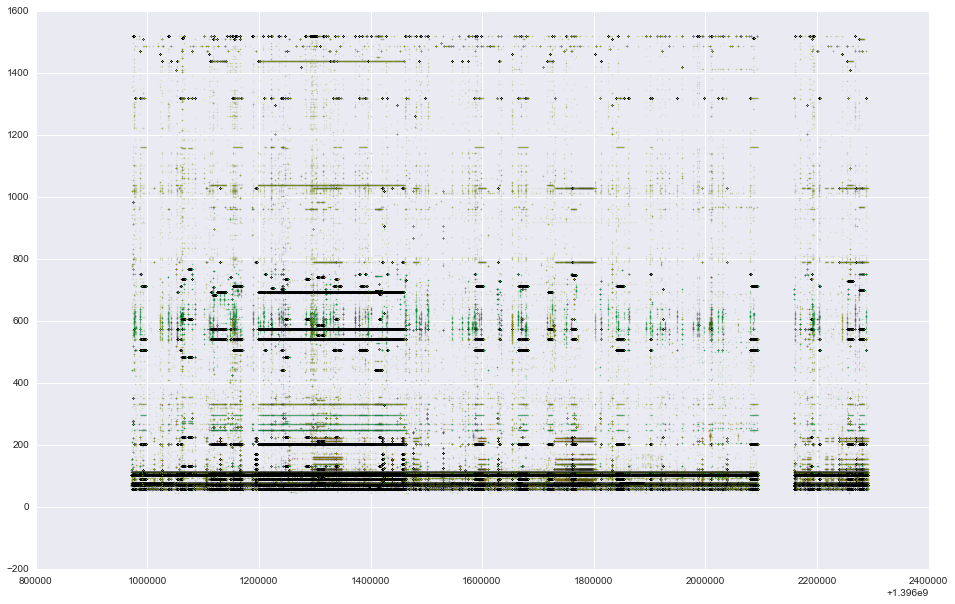

In [145]:
plt.scatter(main_dframe['frame.time_epoch'], main_dframe['frame.len'], c=main_dframe['ip.ttl'], cmap='gist_rainbow', alpha=0.1, s=1, marker=',')


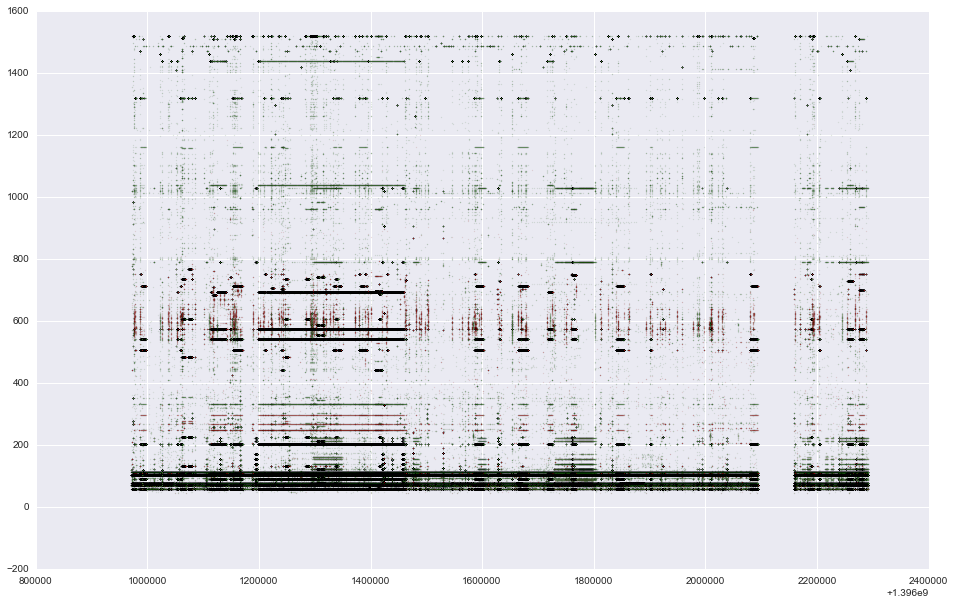

In [147]:
plt.scatter(main_dframe['frame.time_epoch'], main_dframe['frame.len'], c=main_dframe['ip.ttl'], cmap='Paired', alpha=0.1, s=1, marker=',')


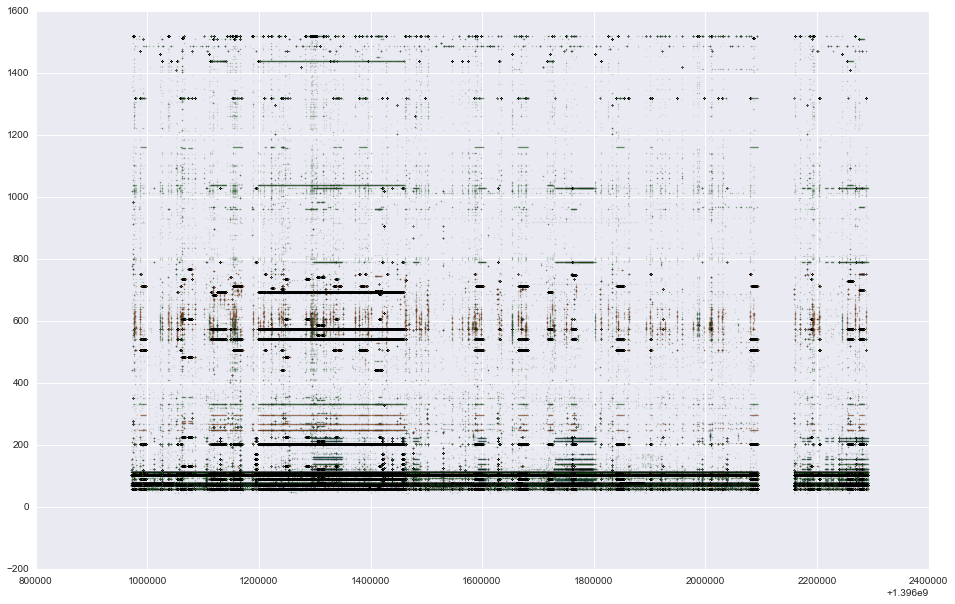

In [149]:
plt.scatter(main_dframe['frame.time_epoch'], main_dframe['frame.len'], c=main_dframe['ip.ttl'], cmap='Set1', alpha=0.1, s=1, marker=',')


In [166]:
main_dframe.shape

(2383800, 15)

In [168]:
comb_frame.shape

(2376356, 4)

ValueError: x and y must be the same size

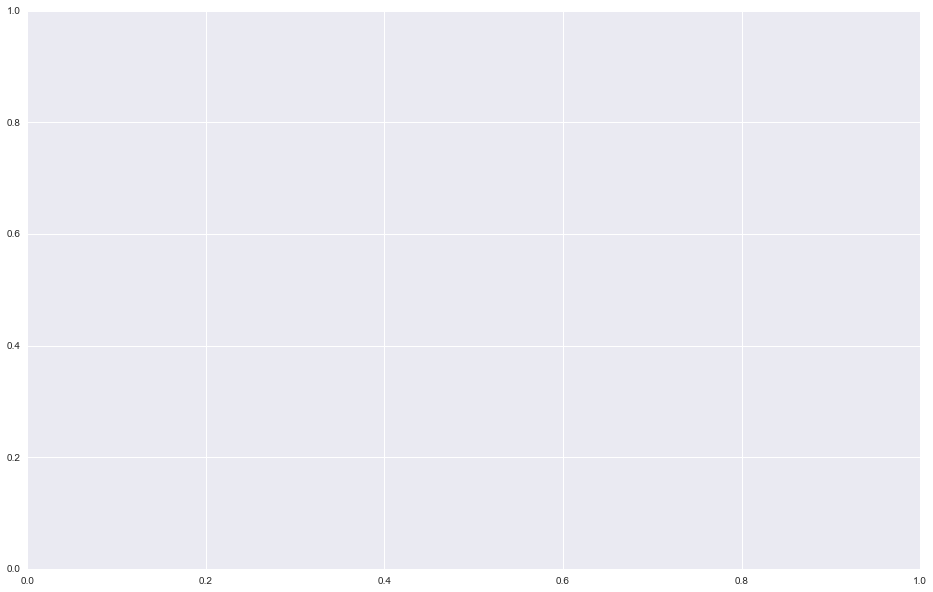

In [169]:
plt.scatter(main_dframe['frame.time_epoch'], comb_frame['ip.src'], c=[main_dframe['frame.len'],main_dframe['frame.len']], cmap='Set1', alpha=0.1, s=1, marker=',')

In [1]:
plt.scatter(main_dframe['frame.time_epoch'], main_dframe['icmp.type'], s=2, marker=',', alpha=0.5)

NameError: name 'plt' is not defined